In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df=pd.read_csv('Walmart.csv')

# Data Understanding

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5872\3023999556.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Exploratory DataAnalysis

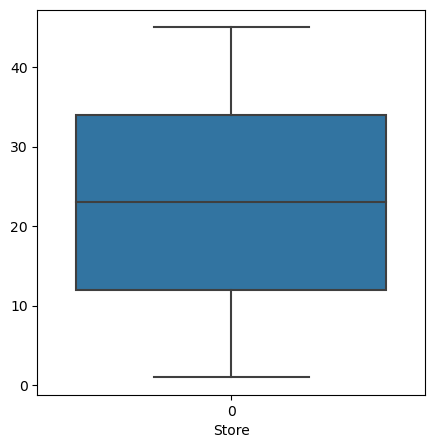

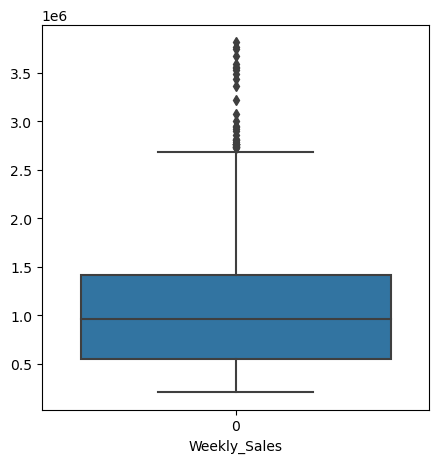

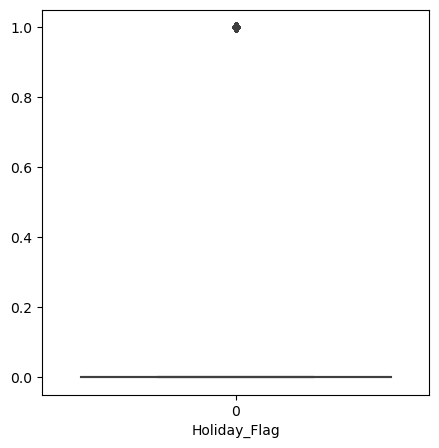

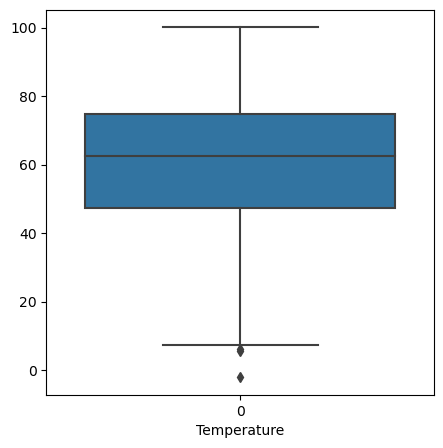

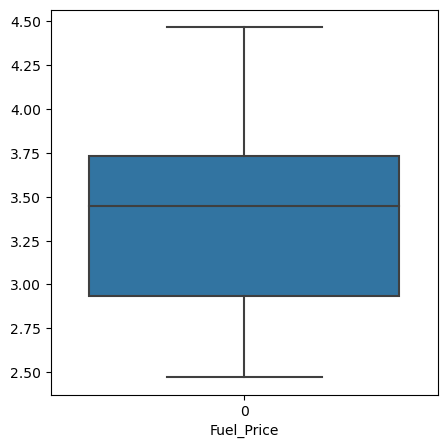

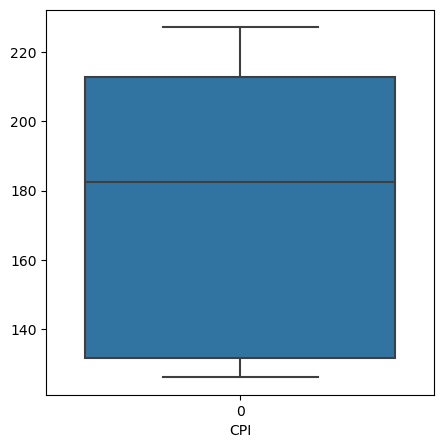

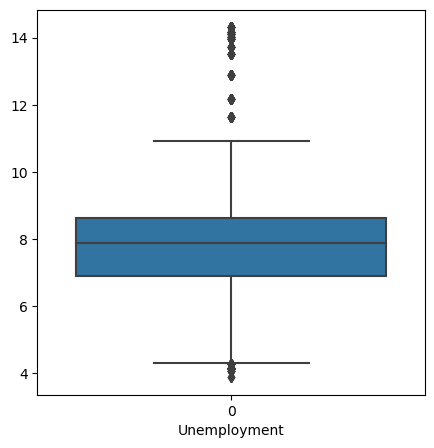

In [7]:
for i in df.columns:
    if i!='Date':
        plt.figure(figsize=(5,5))
        sns.boxplot(df[i])
        plt.xlabel(i)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5872\2450457689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'], hist_kws=dict(edgecolor="black"))


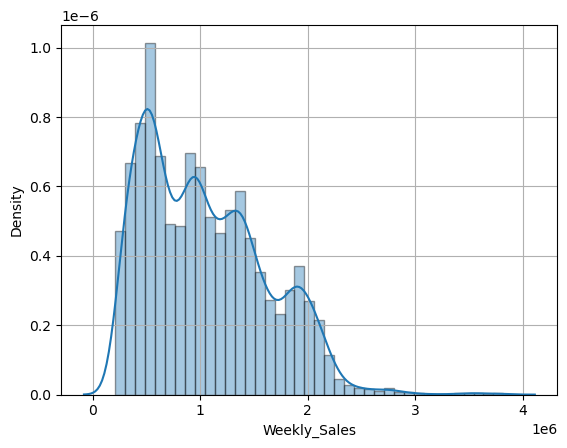

In [8]:
sns.distplot(df['Weekly_Sales'], hist_kws=dict(edgecolor="black"))
plt.grid()
plt.show()

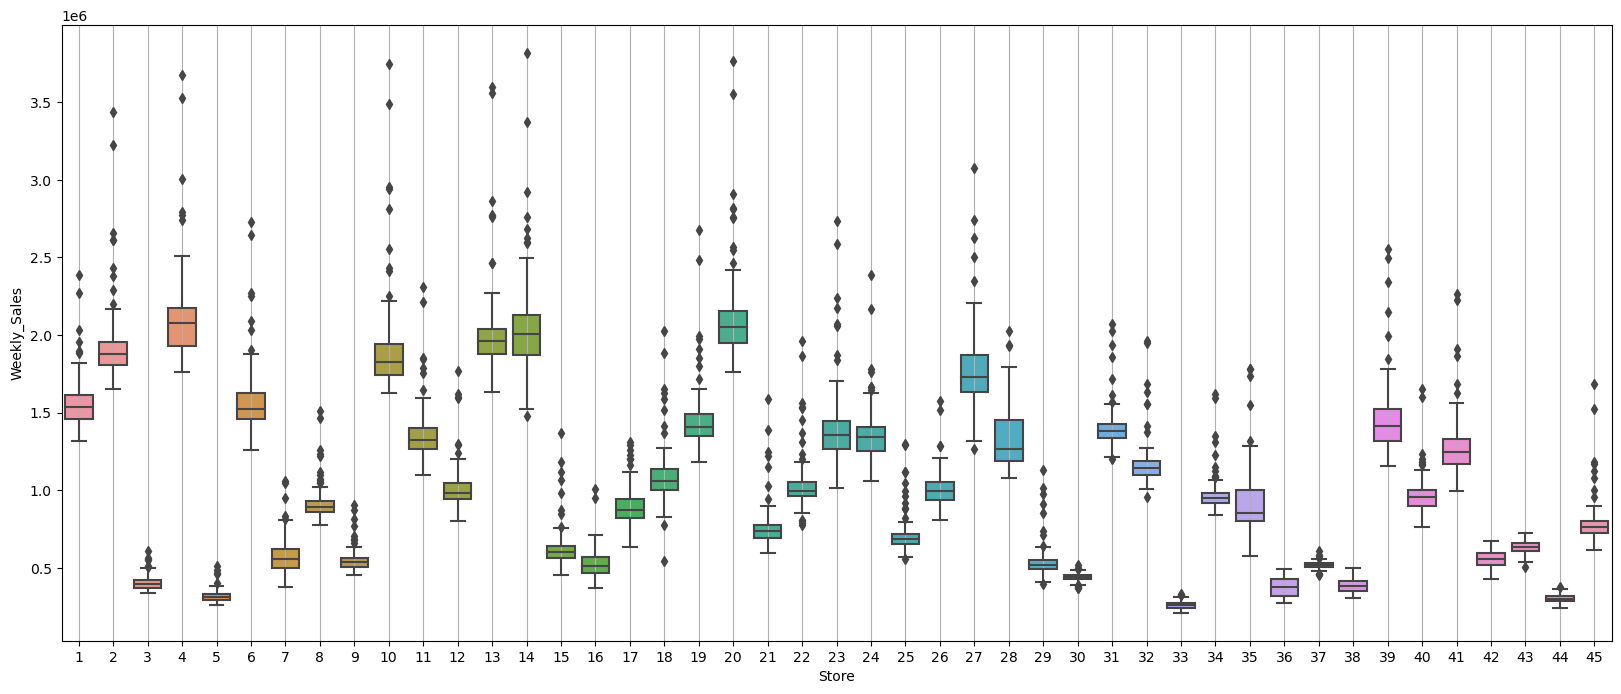

In [9]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.grid(axis='x')
plt.show()


* a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

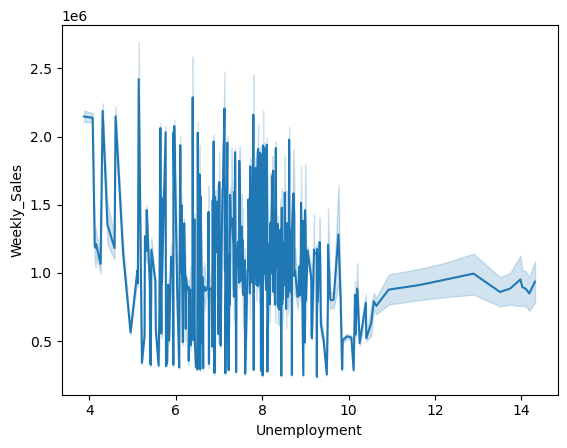

In [94]:
sns.lineplot(x=df['Unemployment'],y=df['Weekly_Sales'])
plt.show()

In [106]:
df[df['Weekly_Sales']==df['Weekly_Sales'].min()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265


In [109]:
df[(df['Unemployment']<=10.5) & (df['Unemployment']>=9.265)]['Store'].value_counts()

34    112
43    112
29     99
33     48
18     40
10     21
42     21
12      4
28      4
38      4
Name: Store, dtype: int64

* Yes the weekly sales are affected by the unemployment rate. The store number 33 suffering the most and there are 9 more stores suffering from unemployment rate.

* b. If the weekly sales show a seasonal trend, when and what could be the reason?

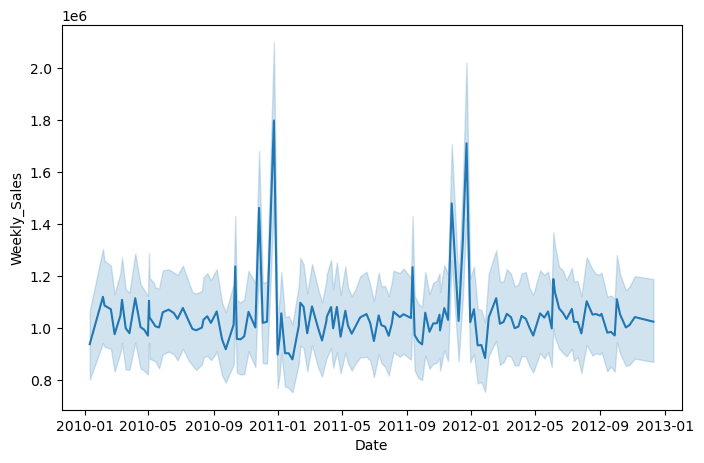

In [144]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Date'],y=df['Weekly_Sales'])
plt.show()
#There is a trend shows that in the Starting month on any year the weekly sales is highest and rest of the months sales in almost constant it is because of the New year time.

* c. Does temperature affect the weekly sales in any manner?

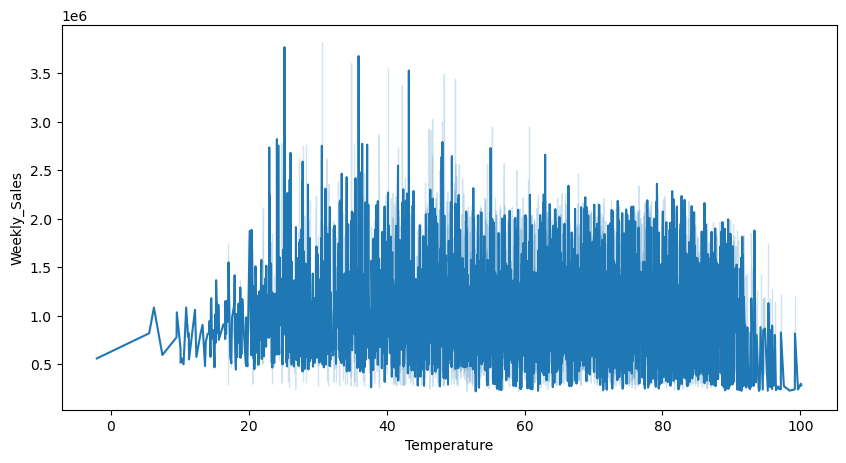

In [111]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Temperature'],y=df['Weekly_Sales'])
plt.show()
#temp(20-90) doesn't have much effect os sales

* d. How is the Consumer Price index affecting the weekly sales of various stores?

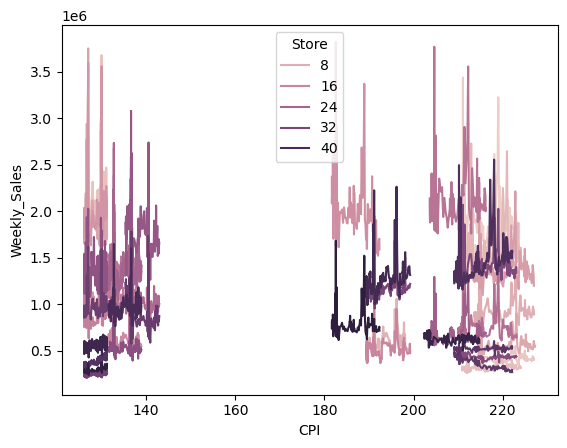

In [113]:
sns.lineplot(x=df['CPI'],y=df[ 'Weekly_Sales'],hue=df['Store'])
plt.show()

* e. Top performing stores according to the historical data.

In [127]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)
#store{4,10,13,14,20} are top 5 performing stores

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795


* f. The worst performing store, and how significant is the difference between the
  highest and lowest performing stores

In [129]:
df.sort_values(by='Weekly_Sales',ascending=False).tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4671,33,2011-02-12,220060.35,0,59.12,3.701,129.845967,8.010
4623,33,2010-12-31,219804.85,1,52.91,3.148,127.087677,9.265
4675,33,2011-12-30,215359.21,1,51.60,3.428,130.071032,8.010
4614,33,2010-10-29,213538.32,0,71.34,3.130,126.436419,9.265
4619,33,2010-03-12,209986.25,0,52.82,3.041,126.731333,9.265


In [142]:
print('Difference between highest and lowest performing store: ' ,3818686.45-209986.25)

Difference between highest and lowest performing store:  3608700.2


# New Dataset

In [10]:
store1=pd.DataFrame(df[df['Store']==1]['Weekly_Sales'])

In [11]:
store1

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
138,1437059.26
139,1670785.97
140,1573072.81
141,1508068.77


In [12]:
store1.describe()

,Weekly_Sales
count,1.430000e+02
mean,1.555264e+06
std,1.559808e+05
min,1.316899e+06
25%,1.458105e+06
50%,1.534850e+06
75%,1.614892e+06
max,2.387950e+06


C:\Users\DELL\AppData\Local\Temp\ipykernel_5872\3136411594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store1,hist_kws=dict(edgecolor='Blue'))


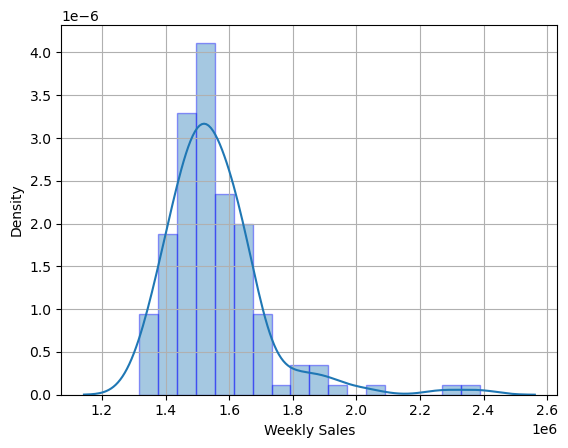

In [13]:
sns.distplot(store1,hist_kws=dict(edgecolor='Blue'))
plt.grid()
plt.xlabel('Weekly Sales')
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(store1)
result[1]
#stationary

1.3877788330759434e-05

In [15]:
m_store1=store1['Weekly_Sales'].mean()
s_store1=store1['Weekly_Sales'].std()

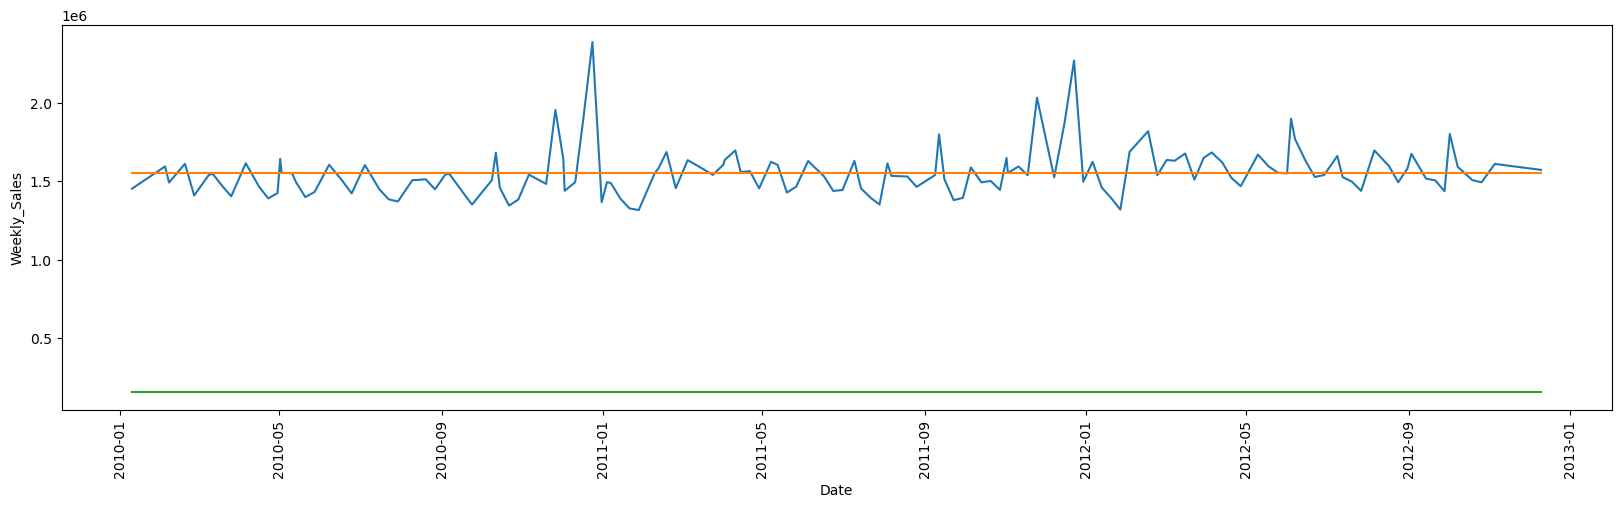

In [16]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df[df['Store']==1]['Date'],y=store1['Weekly_Sales'])
sns.lineplot(x=df[df['Store']==1]['Date'],y=m_store1)
sns.lineplot(x=df[df['Store']==1]['Date'],y=s_store1)
plt.xticks(rotation=90)
plt.show()


In [17]:
rm1=store1.rolling(window=7).mean()
rm_detrend1=store1-rm1

In [18]:
m_detrend1=rm_detrend1['Weekly_Sales'].mean()
s_detrend1=rm_detrend1['Weekly_Sales'].std()


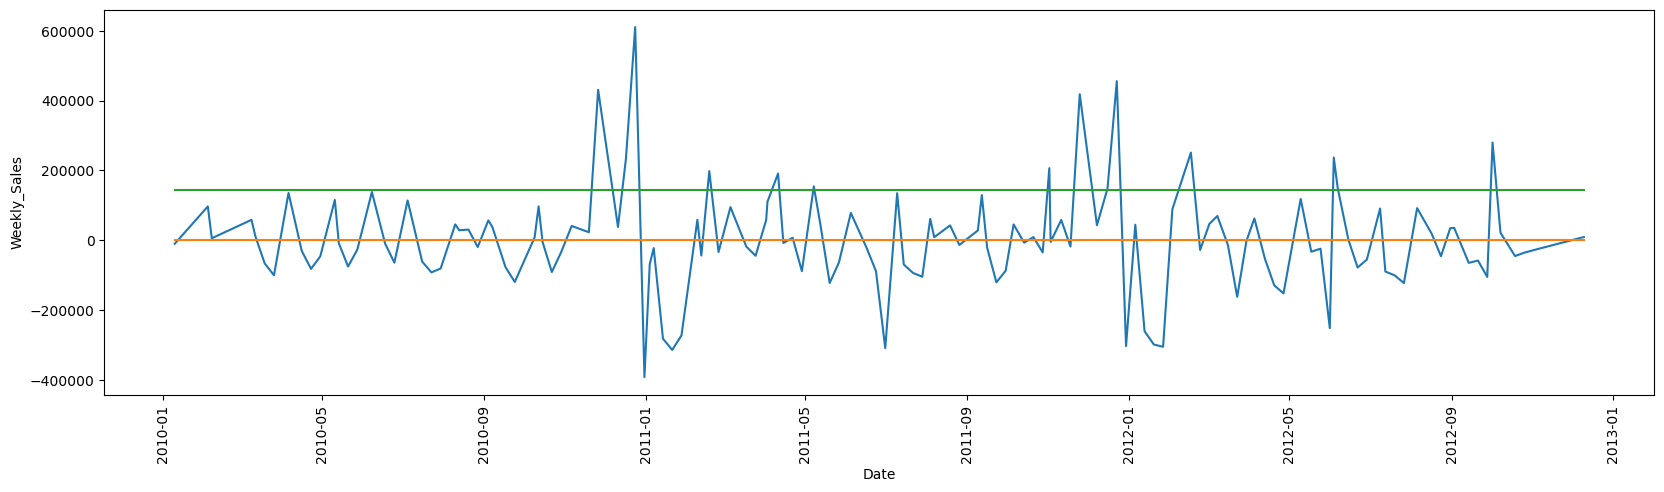

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df[df['Store']==1]['Date'],y=rm_detrend1['Weekly_Sales'])
sns.lineplot(x=df[df['Store']==1]['Date'],y=m_detrend1)
sns.lineplot(x=df[df['Store']==1]['Date'],y=s_detrend1)
plt.xticks(rotation=90)
plt.show()

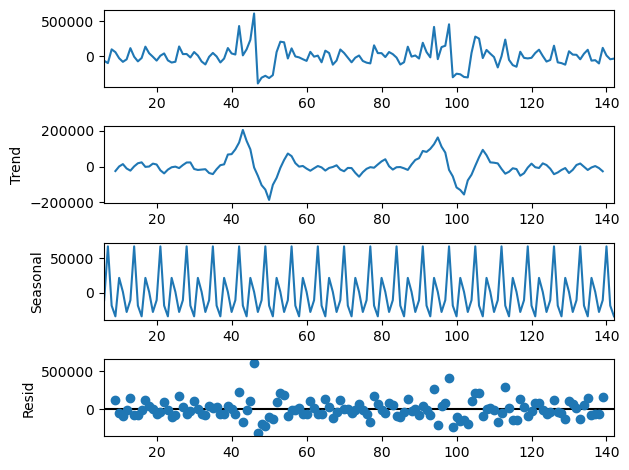

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(rm_detrend1.dropna(),period=7)
decompose.plot();


In [21]:
rm_detrend1

,Weekly_Sales
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
138,-105291.504286
139,118018.360000
140,9026.567143
141,-45403.954286


In [22]:
rm_detrend_diff1=rm_detrend1-rm_detrend1.shift()
rm_detrend_diff1

,Weekly_Sales
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
138,-46873.841429
139,223309.864286
140,-108991.792857
141,-54430.521429


In [23]:
m_detrend_diff1=rm_detrend_diff1['Weekly_Sales'].mean()
s_detrend_diff1=rm_detrend_diff1['Weekly_Sales'].std()

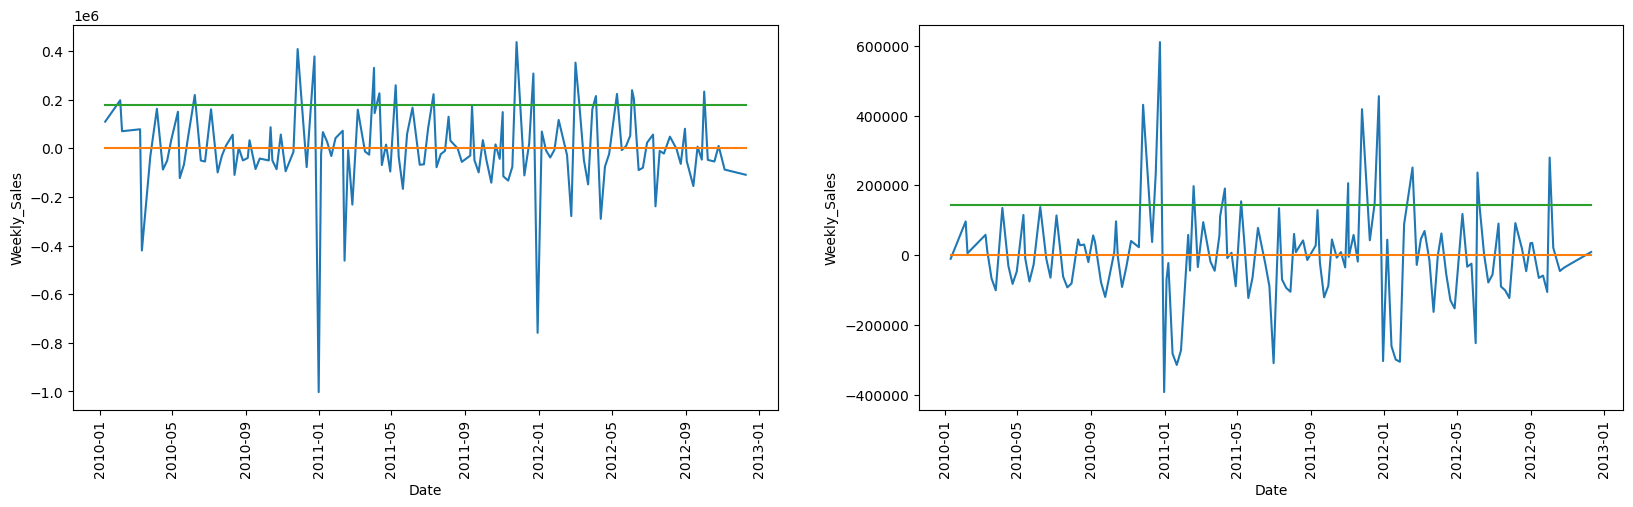

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=df[df['Store']==1]['Date'],y=rm_detrend_diff1['Weekly_Sales'])
sns.lineplot(x=df[df['Store']==1]['Date'],y=m_detrend_diff1)
sns.lineplot(x=df[df['Store']==1]['Date'],y=s_detrend_diff1)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.lineplot(x=df[df['Store']==1]['Date'],y=rm_detrend1['Weekly_Sales'])
sns.lineplot(x=df[df['Store']==1]['Date'],y=m_detrend1)
sns.lineplot(x=df[df['Store']==1]['Date'],y=s_detrend1)
plt.xticks(rotation=90)

plt.show()

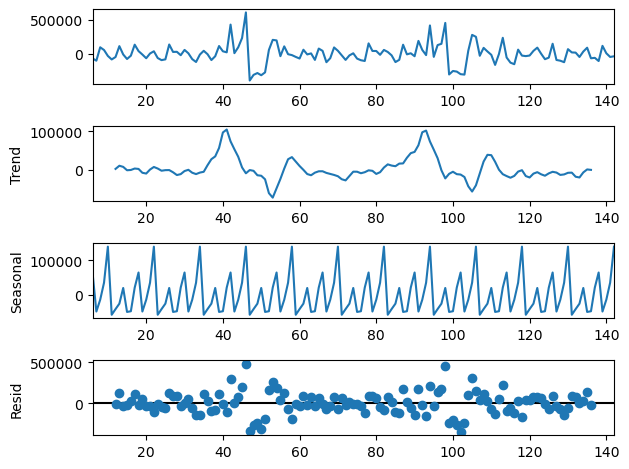

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(rm_detrend1.dropna(),period=12)
decompose.plot();

In [48]:
from pmdarima import auto_arima
order=auto_arima(rm_detrend_diff1.dropna())

ValueError: y should be a 1d array, got an array of shape (43, 2) instead.

In [51]:
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  136
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -1794.918
Date:                Mon, 11 Dec 2023   AIC                           3607.835
Time:                        13:09:39   BIC                           3634.049
Sample:                             0   HQIC                          3618.488
                                - 136                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    568.4122    856.687      0.664      0.507   -1110.663    2247.487
ar.L1          0.4950      0.332      1.491      0.136      -0.156       1.146
ar.L2         -0.1492      0.119     -1.251      0.211      -0.383       0.085
ar.L3         -0.1050      0.101     -1.044      0.297      -0.302       0.092
ar.L4          0.2240      0.115      1.940      0.052      -0.002       0.450
ar.L5         -0.4421      0.104     -4.242      0.000      -0.646      -0.238
ma.L1         -1.2043      0.366     -3.289      0.001      -1.922      -0.487
ma.L2          0.2377      0.350      0.680      0.497      -0.448       0.923
sigma2      2.003e+10   2.68e-05   7.49e+14      0.000       2e+10       2e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                63.36
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.60
Prob(H) (two-sided):                  0.18   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.58e+31. Standard errors may be unstable.
"""

In [49]:
rm_detrend_diff1

,Weekly_Sales,Predict
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
138,-46873.841429,6529.330345
139,223309.864286,-238.960425
140,-108991.792857,-21565.754508
141,-54430.521429,37194.147104


In [50]:
train=rm_detrend_diff1.iloc[:100]
test=rm_detrend_diff1.iloc[100:]

In [74]:
train

,Weekly_Sales,Predict
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
95,-462173.570000,NaN
96,173152.772857,NaN
97,19218.921429,NaN
98,307160.975714,NaN


In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Weekly_Sales'],order=(5,0,2),seasonal_order=(4,0,2,7))
model_fit=model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
rm_detrend_diff1['Predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: >

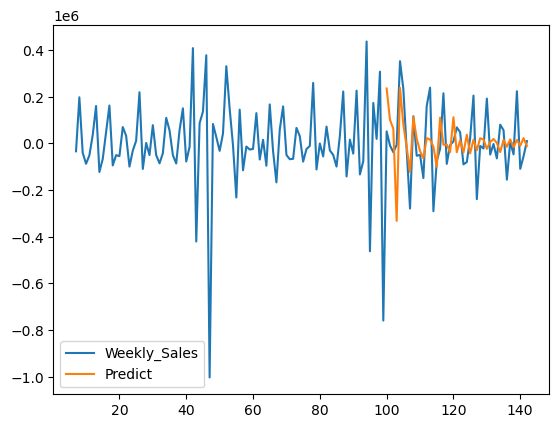

In [78]:
rm_detrend_diff1[['Weekly_Sales','Predict']].plot()

In [79]:
from prophet import Prophet

In [80]:
set1=pd.DataFrame(columns=['ds','y'])
set1

,ds,y


In [81]:
df[df['Store']==1]['Date']


0     2010-05-02
1     2010-12-02
2     2010-02-19
3     2010-02-26
4     2010-05-03
         ...    
138   2012-09-28
139   2012-05-10
140   2012-12-10
141   2012-10-19
142   2012-10-26
Name: Date, Length: 143, dtype: datetime64[ns]

In [82]:
set1['ds']=df[df['Store']==1]['Date']
set1['y']=df[df['Store']==1]['Weekly_Sales']


In [83]:
set1

,ds,y
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-05-10,1670785.97
140,2012-12-10,1573072.81
141,2012-10-19,1508068.77


In [84]:
m=Prophet(interval_width=0.95)
m.fit(set1)

13:15:51 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
future=m.make_future_dataframe(periods=12,freq='W')
future.head()

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26


In [86]:
future.tail(15)

,ds
140,2012-10-26
141,2012-11-05
142,2012-12-10
143,2012-12-16
144,2012-12-23
145,2012-12-30
146,2013-01-06
147,2013-01-13
148,2013-01-20
149,2013-01-27


In [87]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-10,1.436040e+06,1.206630e+06,1.657565e+06
1,2010-02-04,1.576836e+06,1.357669e+06,1.792915e+06
2,2010-02-07,1.651740e+06,1.405412e+06,1.876701e+06
3,2010-02-19,1.533404e+06,1.319542e+06,1.739133e+06
4,2010-02-26,1.486290e+06,1.272713e+06,1.704117e+06
...,...,...,...,...
150,2013-02-03,1.736412e+06,1.489971e+06,1.943314e+06
151,2013-02-10,1.813721e+06,1.591599e+06,2.030679e+06
152,2013-02-17,1.792142e+06,1.565351e+06,2.012951e+06
153,2013-02-24,1.740687e+06,1.500003e+06,1.960245e+06


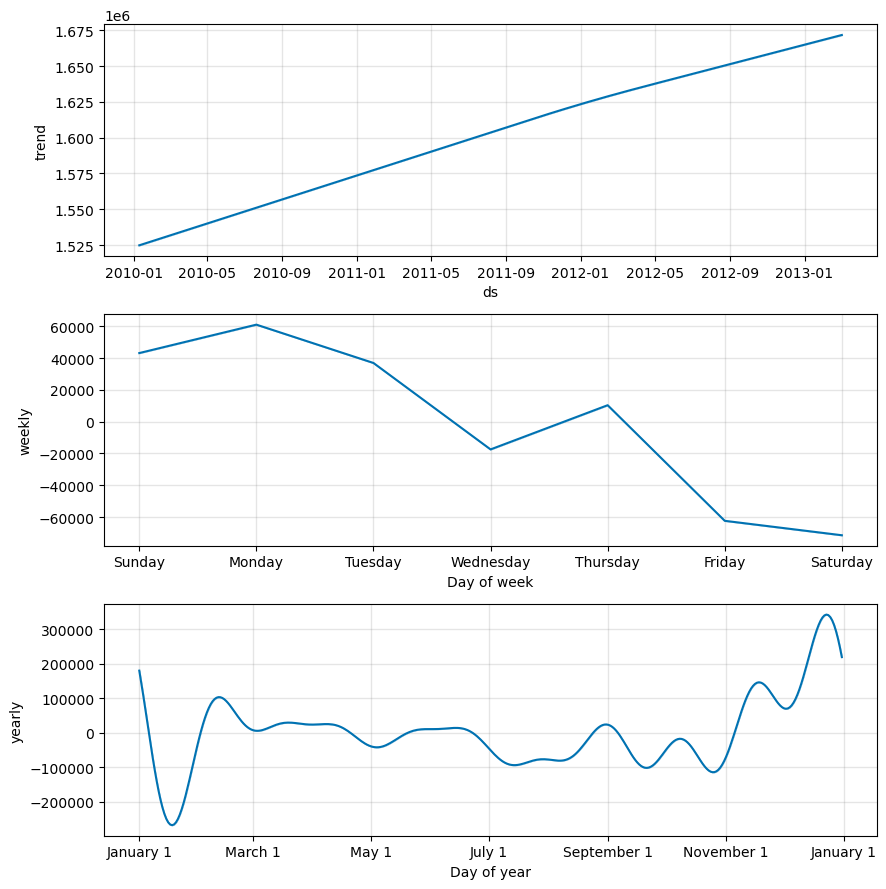

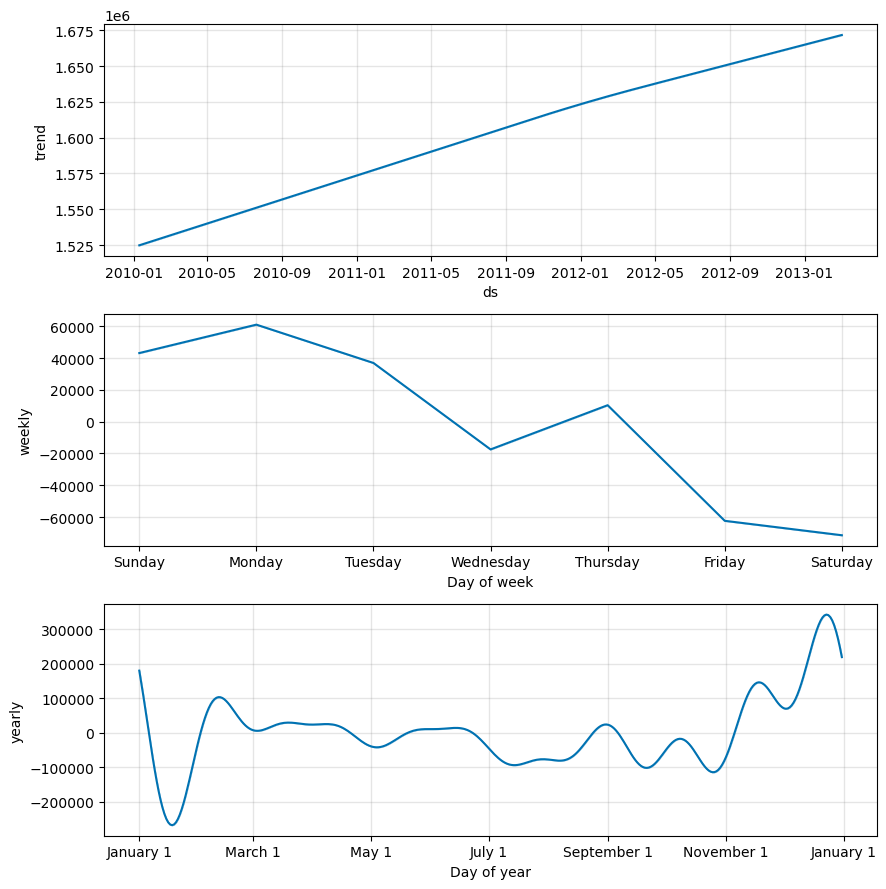

In [88]:
m.plot_components(forecast)

In [89]:
set1

,ds,y
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-05-10,1670785.97
140,2012-12-10,1573072.81
141,2012-10-19,1508068.77


In [90]:
forecast['yhat'].tail()

150    1.736412e+06
151    1.813721e+06
152    1.792142e+06
153    1.740687e+06
154    1.720266e+06
Name: yhat, dtype: float64

<Axes: >

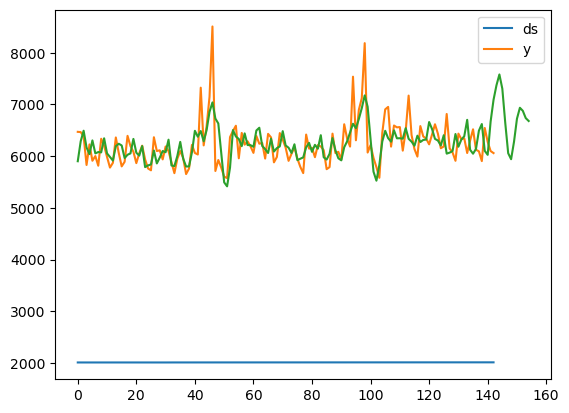

In [91]:
set1.plot()
forecast['yhat'].plot()


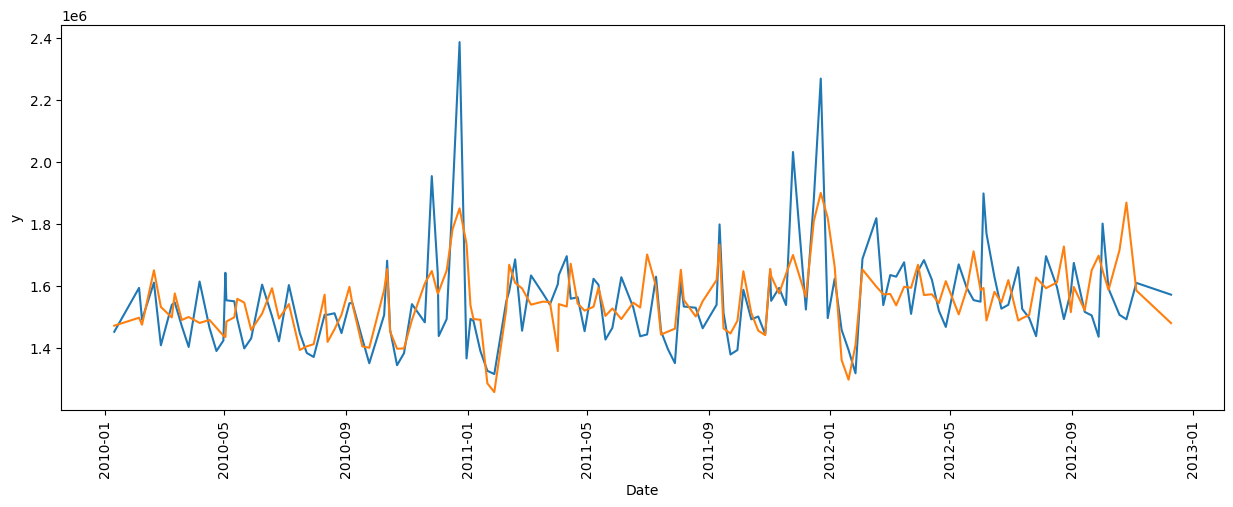

In [92]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df[df['Store']==1]['Date'],y=set1['y'])
sns.lineplot(x=df[df['Store']==1]['Date'],y=forecast['yhat'])
plt.xticks(rotation=90)

plt.show()